# **BDM-3035 Big Data Capstone Project**
Instructor: Meysam Effati

Members:


*   Ann Margaret Silva (C0903604)
*   Antonio Carlos De Mello Mendes (C0866063)

*   Maria Jessa Cruz (C0910329)
*   Prescila Mora (C0896891)


*   Rewant Sharma (C0894265)



Datasets:

*https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi*

*https://cwfis.cfs.nrcan.gc.ca/background/summary/fbp*


# **Wildfire Prediction Data**

In [97]:
# Install the required package
%pip install python-dotenv pymongo geopandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
# Import Libraries

import os
from pymongo import MongoClient
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv


In [99]:
# Load environment variables from the .env file
dotenv_path = r'C:\Users\mariajessa\OneDrive - Lambton College\2024S\Capstone Project\mongodb.env'  
load_dotenv(dotenv_path)

True

In [100]:
# Define the environment variables
db_name = os.getenv("DB_NAME")
mongo_uri = os.getenv("MONGO_URI")

In [101]:
# Define the collections to read data from
collections = [
    'wildfire_collection_2020',
    'wildfire_collection_2021',
    'wildfire_collection_2022',
    'wildfire_collection_2023'
]

In [102]:
# List of years to read GeoJSON files from 2020 to 2023
years = range(2020, 2024)

In [103]:
# Connect to MongoDB
client = MongoClient(mongo_uri)
db = client[db_name]

C:\Users\mariajessa\AppData\Local\Temp\ipykernel_4996\2125056448.py:2: UserWarning: You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb
  client = MongoClient(mongo_uri)


In [104]:
# Create a function to load data from MongoDB into a GeoDataFrame
def load_data_from_mongodb(collection_name):
    collection = db[collection_name]
    data = list(collection.find())
    df = pd.DataFrame(data)
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
    gdf.set_crs(epsg=4326, inplace=True)  
    return gdf

In [105]:
# Create an empty list to store GeoDataFrames
geojson_final_data = []

In [106]:
# Load data for each collection and append to the list
for collection_name in collections:
    gdf = load_data_from_mongodb(collection_name)
    geojson_final_data.append(gdf)

In [107]:
# Concatenate the list of GeoDataFrames into one GeoDataFrame
geo_wfp = gpd.GeoDataFrame(pd.concat(geojson_final_data, ignore_index=True))

C:\Users\mariajessa\AppData\Local\Temp\ipykernel_4996\2261546383.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  geo_wfp = gpd.GeoDataFrame(pd.concat(geojson_final_data, ignore_index=True))


In [108]:
geo_wfp

,_id,lat,lon,rep_date,uid,source,sensor,satellite,agency,temp,...,pcuring,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,cbh,geometry
0,6669b15b44a41007063ba9da,62.116300,-161.826000,2020/06/02 12:54:00.000,43256707.0,NASA4,IBAND,S-NPP,UAK,15.917000,...,50.0,1.0,90,1.011450,0.000000,0.35,2,0.35,NaN,POINT (-161.82600 62.11630)
1,6669b15e44a41007063ba9db,61.629100,-164.449000,2020/06/11 12:36:00.000,43256708.0,NASA5,IBAND,NOAA-20,UAK,26.064000,...,50.0,1.0,24,0.435360,0.000000,0.10,2,0.10,NaN,POINT (-164.44900 61.62910)
2,6669b15e44a41007063ba9dc,47.474000,-69.938000,2020/06/20 06:30:00.000,43256709.0,USFS,IBAND,JPSS1,QC,24.666000,...,29.0,1.0,27,-1.000000,0.000000,1.36,,1.36,-1.0,POINT (-69.93800 47.47400)
3,6669b15e44a41007063ba9dd,32.392000,-110.804000,2020/06/22 08:24:00.000,43256710.0,NASA6,IBAND,S-NPP,UAZ,32.754000,...,50.0,1.0,1534,0.212800,0.000530,0.35,12,0.35,NaN,POINT (-110.80400 32.39200)
4,6669b15e44a41007063ba9de,33.472000,-91.333200,2020/06/13 07:06:00.000,43256711.0,NASA7,IBAND,NOAA-20,UAR,31.359000,...,50.0,1.0,38,0.102444,0.000499,0.35,8,0.35,NaN,POINT (-91.33320 33.47200)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450337,6670e69da6dc531d5ed14328,56.340000,-119.229897,2023/05/13 21:29:00.000,NaN,NASA,MODIS,Aqua,AB,25.278999,...,NaN,NaN,640,5.329375,0.032534,2.44,9,2.19,NaN,POINT (-119.22990 56.34000)
450338,6670e69ea6dc531d5ed14329,31.086281,-98.919960,2023/03/26 07:58:00.000,NaN,NASA7,VIIRS-I,NOAA-20,UTX,21.538000,...,100.0,0.0,472,0.242550,0.008307,0.35,9,0.35,NaN,POINT (-98.91996 31.08628)
450339,6670e69ea6dc531d5ed1432a,56.339291,-119.209106,2023/05/13 21:29:00.000,NaN,NASA,MODIS,Aqua,AB,25.422001,...,NaN,NaN,624,8.216022,0.217550,2.52,9,2.20,NaN,POINT (-119.20911 56.33929)
450340,6670e69ea6dc531d5ed1432b,56.049808,-116.394592,2023/05/13 08:43:00.000,NaN,NASA2,VIIRS-I,S-NPP,AB,25.267000,...,NaN,NaN,733,17.867018,0.162315,2.38,9,2.00,NaN,POINT (-116.39459 56.04981)


# **Data Cleaning**







In [109]:
# Data Inspection
print("\nDescribe the GeoDataFrame:")
geo_wfp.describe()


Describe the GeoDataFrame:


,lat,lon,uid,temp,rh,ws,wd,pcp,ffmc,dmc,...,cfb,estarea,pcuring,greenup,elev,sfl,cfl,tfc0,sfc0,cbh
count,450342.000000,450342.000000,1.242140e+05,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,...,450339.000000,28263.000000,425990.000000,425990.00000,450342.000000,450342.000000,450342.000000,450339.000000,450339.000000,182649.000000
mean,47.087916,-110.010441,4.331366e+07,23.058456,36.686720,13.956673,196.807948,0.534137,89.126303,95.263200,...,31.308437,47.226963,49.936846,0.72128,701.436197,9.556830,0.371298,2.151030,1.878887,5.125306
std,11.865684,18.039074,3.697741e+04,7.093647,15.424503,5.922645,95.635528,2.785133,7.647873,97.460619,...,40.854987,41.258084,31.819724,0.44837,657.176444,15.913778,0.620658,1.849023,1.547191,3.100689
min,25.000200,-165.826004,4.325090e+07,-45.268002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000
25%,36.105900,-120.730756,4.328195e+07,19.127000,26.000000,9.661250,135.000000,0.000000,87.086998,34.110250,...,0.000000,21.354000,25.000000,0.00000,264.000000,0.569385,0.001207,0.350000,0.350000,3.697240
50%,50.065950,-110.498692,4.331301e+07,23.712999,35.000000,12.803000,210.000000,0.002000,90.649002,68.554001,...,0.000000,35.912800,50.000000,1.00000,424.000000,4.648921,0.241934,1.660000,1.440000,4.651320
75%,56.220001,-96.537003,4.334406e+07,27.944000,46.000000,16.996000,271.000000,0.122000,93.303001,112.562752,...,78.000000,65.378200,75.000000,1.00000,1021.000000,14.686516,0.601541,3.650000,3.250000,6.294507
max,70.558000,-52.985000,4.338483e+07,48.426000,99.000000,93.580002,360.000000,96.686000,99.000000,909.347000,...,100.000000,476.564000,100.000000,1.00000,3558.000000,99.984642,6.878477,15.850000,15.850000,17.766396


In [110]:
# Check for missing values
print("\nMissing values in the GeoDataFrame:")
geo_wfp.isnull().sum()


Missing values in the GeoDataFrame:


_id               0
lat               0
lon               0
rep_date          0
uid          326128
source            0
sensor            0
satellite         0
agency            0
temp              0
rh                0
ws                0
wd                0
pcp               0
ffmc              0
dmc               0
dc                0
isi               0
bui               0
fwi               0
fuel              0
ros               3
sfc               3
tfc               3
bfc          211210
hfi               3
cfb               3
estarea      422079
pcuring       24352
greenup       24352
elev              0
sfl               0
cfl               0
tfc0              3
ecozone           0
sfc0              3
cbh          267693
geometry          0
dtype: int64

In [111]:
# Check for columns with more than 50% null values and drop them
threshold = 0.5 * len(geo_wfp)
columns_to_drop = geo_wfp.columns[geo_wfp.isnull().sum() > threshold]
print(f"\nColumns with more than 50% null values and will be dropped: {list(columns_to_drop)}")


Columns with more than 50% null values and will be dropped: ['uid', 'estarea', 'cbh']


In [112]:
geo_wfp.drop(columns=columns_to_drop, inplace=True)

In [113]:
geo_wfp

,_id,lat,lon,rep_date,source,sensor,satellite,agency,temp,rh,...,cfb,pcuring,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,geometry
0,6669b15b44a41007063ba9da,62.116300,-161.826000,2020/06/02 12:54:00.000,NASA4,IBAND,S-NPP,UAK,15.917000,69,...,0.0,50.0,1.0,90,1.011450,0.000000,0.35,2,0.35,POINT (-161.82600 62.11630)
1,6669b15e44a41007063ba9db,61.629100,-164.449000,2020/06/11 12:36:00.000,NASA5,IBAND,NOAA-20,UAK,26.064000,52,...,0.0,50.0,1.0,24,0.435360,0.000000,0.10,2,0.10,POINT (-164.44900 61.62910)
2,6669b15e44a41007063ba9dc,47.474000,-69.938000,2020/06/20 06:30:00.000,USFS,IBAND,JPSS1,QC,24.666000,54,...,0.0,29.0,1.0,27,-1.000000,0.000000,1.36,,1.36,POINT (-69.93800 47.47400)
3,6669b15e44a41007063ba9dd,32.392000,-110.804000,2020/06/22 08:24:00.000,NASA6,IBAND,S-NPP,UAZ,32.754000,11,...,0.0,50.0,1.0,1534,0.212800,0.000530,0.35,12,0.35,POINT (-110.80400 32.39200)
4,6669b15e44a41007063ba9de,33.472000,-91.333200,2020/06/13 07:06:00.000,NASA7,IBAND,NOAA-20,UAR,31.359000,37,...,0.0,50.0,1.0,38,0.102444,0.000499,0.35,8,0.35,POINT (-91.33320 33.47200)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450337,6670e69da6dc531d5ed14328,56.340000,-119.229897,2023/05/13 21:29:00.000,NASA,MODIS,Aqua,AB,25.278999,25,...,62.0,NaN,NaN,640,5.329375,0.032534,2.44,9,2.19,POINT (-119.22990 56.34000)
450338,6670e69ea6dc531d5ed14329,31.086281,-98.919960,2023/03/26 07:58:00.000,NASA7,VIIRS-I,NOAA-20,UTX,21.538000,18,...,0.0,100.0,0.0,472,0.242550,0.008307,0.35,9,0.35,POINT (-98.91996 31.08628)
450339,6670e69ea6dc531d5ed1432a,56.339291,-119.209106,2023/05/13 21:29:00.000,NASA,MODIS,Aqua,AB,25.422001,25,...,80.0,NaN,NaN,624,8.216022,0.217550,2.52,9,2.20,POINT (-119.20911 56.33929)
450340,6670e69ea6dc531d5ed1432b,56.049808,-116.394592,2023/05/13 08:43:00.000,NASA2,VIIRS-I,S-NPP,AB,25.267000,24,...,73.0,NaN,NaN,733,17.867018,0.162315,2.38,9,2.00,POINT (-116.39459 56.04981)


In [114]:
# Check again the columns with null values
geo_wfp.isnull().sum()

_id               0
lat               0
lon               0
rep_date          0
source            0
sensor            0
satellite         0
agency            0
temp              0
rh                0
ws                0
wd                0
pcp               0
ffmc              0
dmc               0
dc                0
isi               0
bui               0
fwi               0
fuel              0
ros               3
sfc               3
tfc               3
bfc          211210
hfi               3
cfb               3
pcuring       24352
greenup       24352
elev              0
sfl               0
cfl               0
tfc0              3
ecozone           0
sfc0              3
geometry          0
dtype: int64

In [115]:
# Data Description
print("\nData Types and Missing Data:")
geo_wfp.info()


Data Types and Missing Data:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 450342 entries, 0 to 450341
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   _id        450342 non-null  object  
 1   lat        450342 non-null  float64 
 2   lon        450342 non-null  float64 
 3   rep_date   450342 non-null  object  
 4   source     450342 non-null  object  
 5   sensor     450342 non-null  object  
 6   satellite  450342 non-null  object  
 7   agency     450342 non-null  object  
 8   temp       450342 non-null  float64 
 9   rh         450342 non-null  int64   
 10  ws         450342 non-null  float64 
 11  wd         450342 non-null  int64   
 12  pcp        450342 non-null  float64 
 13  ffmc       450342 non-null  float64 
 14  dmc        450342 non-null  float64 
 15  dc         450342 non-null  float64 
 16  isi        450342 non-null  float64 
 17  bui        450342 non-null  float64 
 18  fwi   

In [116]:
# Modify AGENCY and FUEL columns type to string to treat them as categorical values
geo_wfp[["agency", "fuel", "ecozone"]] = geo_wfp[["agency", "fuel", "ecozone"]].astype("str")

In [117]:
geo_wfp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 450342 entries, 0 to 450341
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   _id        450342 non-null  object  
 1   lat        450342 non-null  float64 
 2   lon        450342 non-null  float64 
 3   rep_date   450342 non-null  object  
 4   source     450342 non-null  object  
 5   sensor     450342 non-null  object  
 6   satellite  450342 non-null  object  
 7   agency     450342 non-null  object  
 8   temp       450342 non-null  float64 
 9   rh         450342 non-null  int64   
 10  ws         450342 non-null  float64 
 11  wd         450342 non-null  int64   
 12  pcp        450342 non-null  float64 
 13  ffmc       450342 non-null  float64 
 14  dmc        450342 non-null  float64 
 15  dc         450342 non-null  float64 
 16  isi        450342 non-null  float64 
 17  bui        450342 non-null  float64 
 18  fwi        450342 non-null  float64 

In [118]:
# Check for duplicate entries
geo_wfp.duplicated().sum()

np.int64(0)

In [119]:
# Check the unique agencies
unique_agencies = geo_wfp['agency'].unique()
unique_agencies

array(['UAK', 'QC', 'UAZ', 'UAR', 'UCA', 'UNM', 'MB', 'UTX', 'UOK', 'UNC',
       'UND', '-', 'YT', 'UVA', 'UOR', 'UAL', 'ON', 'UMT', 'UKS', 'UFL',
       'UMS', 'UGA', 'ULA', 'UID', 'UNV', 'UUT', 'UCO', 'UMO', 'AB',
       'UWA', 'UOH', 'NT', 'UMN', 'UWV', 'USC', 'SK', 'BC', 'UWY', 'UPA',
       'UIA', 'UNY', 'UTN', 'UIL', 'UNE', 'UIN', 'USD', 'UWI', 'UKY', 'M',
       'NL', 'NB', 'UNJ', 'UNH', 'UMA', 'UME', 'UDE', 'UMI', 'UMD', 'URI',
       'NU', 'UCT', 'PE', 'UVT', 'NS'], dtype=object)

In [120]:
# Define the list of Canadian agency codes
canadian_agencies = ["QC", "MB", "ON", "AB", "SK", "BC", "NT", "YT", "NL", "NB", "PE", "NS", "NU"]

In [121]:
# Filter the DataFrame for records where the 'agency' column is in the list of Canadian agencies
geo_wfp_canada = geo_wfp[geo_wfp['agency'].isin(canadian_agencies)]
geo_wfp_canada

,_id,lat,lon,rep_date,source,sensor,satellite,agency,temp,rh,...,cfb,pcuring,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,geometry
2,6669b15e44a41007063ba9dc,47.474000,-69.938000,2020/06/20 06:30:00.000,USFS,IBAND,JPSS1,QC,24.666000,54,...,0.0,29.0,1.0,27,-1.000000,0.000000,1.36,,1.36,POINT (-69.93800 47.47400)
7,6669b15f44a41007063ba9e1,49.640000,-71.360000,2020/06/19 01:02:00.000,NOAA,AVHRR,METOP-A,QC,30.944000,28,...,100.0,47.0,1.0,306,14.927600,0.759355,2.71,6b,1.91,POINT (-71.36000 49.64000)
11,6669b15f44a41007063ba9e5,50.782000,-98.934000,2020/06/25 08:12:00.000,USFS,IBAND,JPSS1,MB,25.992000,58,...,0.0,30.0,1.0,268,4.616690,0.000000,0.22,10,0.22,POINT (-98.93400 50.78200)
31,6669b16344a41007063ba9f9,66.476000,-138.357000,2020/06/15 22:06:00.000,USFS,IBAND,S-NPP,YT,23.022000,54,...,0.0,35.0,1.0,616,18.403400,0.006890,0.35,11,0.35,POINT (-138.35700 66.47600)
44,6669b16544a41007063baa06,42.780000,-82.458000,2020/06/20 17:54:00.000,USFS,IBAND,JPSS1,ON,29.687000,43,...,0.0,35.0,1.0,187,5.222190,0.021985,0.35,8,0.35,POINT (-82.45800 42.78000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450328,6670e69ba6dc531d5ed1431f,58.522339,-119.981682,2023/09/04 09:45:00.000,NASA2,VIIRS-I,S-NPP,AB,15.137000,45,...,0.0,NaN,NaN,422,9.949460,0.354920,2.32,4,2.32,POINT (-119.98168 58.52234)
450335,6670e69da6dc531d5ed14326,56.342049,-119.202568,2023/05/13 21:29:00.000,NASA,MODIS,Aqua,AB,25.420000,25,...,78.0,NaN,NaN,624,9.323910,0.032769,2.51,9,2.20,POINT (-119.20257 56.34205)
450337,6670e69da6dc531d5ed14328,56.340000,-119.229897,2023/05/13 21:29:00.000,NASA,MODIS,Aqua,AB,25.278999,25,...,62.0,NaN,NaN,640,5.329375,0.032534,2.44,9,2.19,POINT (-119.22990 56.34000)
450339,6670e69ea6dc531d5ed1432a,56.339291,-119.209106,2023/05/13 21:29:00.000,NASA,MODIS,Aqua,AB,25.422001,25,...,80.0,NaN,NaN,624,8.216022,0.217550,2.52,9,2.20,POINT (-119.20911 56.33929)


# **Exploratory Data Analysis (EDA)**

C:\Users\mariajessa\AppData\Local\Temp\ipykernel_4996\301669556.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


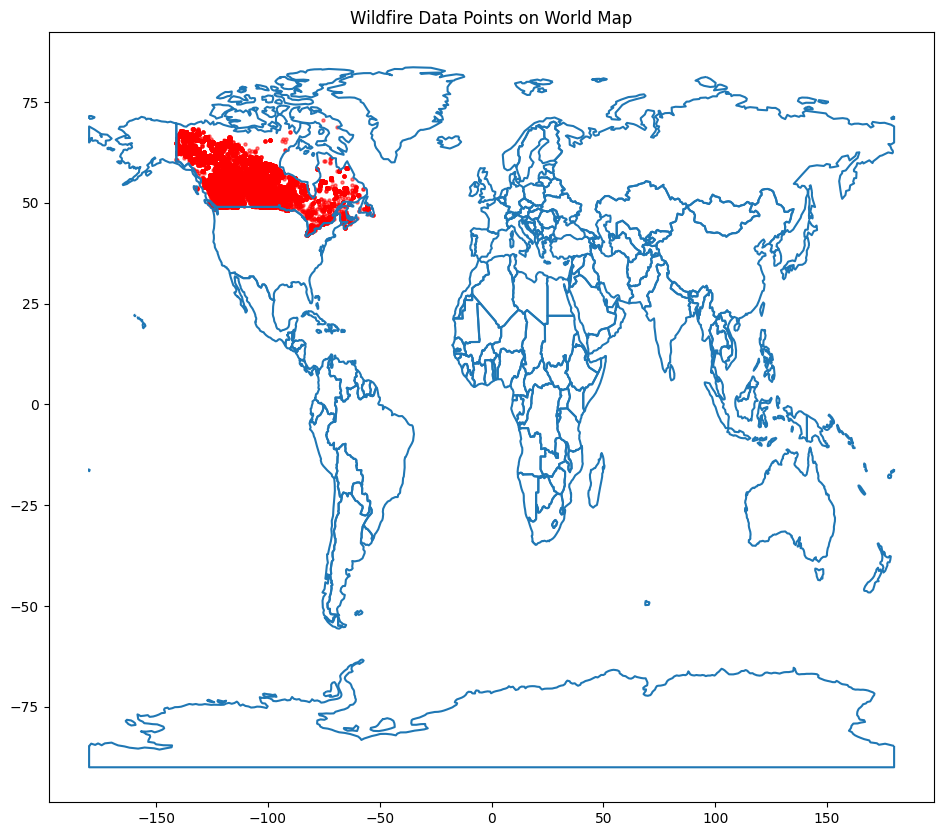

In [122]:
# Check the filtered data is within Canada's boundaries 
# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the base map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

# Plot wildfire data points on the base map
geo_wfp_canada.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)
plt.title('Wildfire Data Points on World Map')
plt.show()

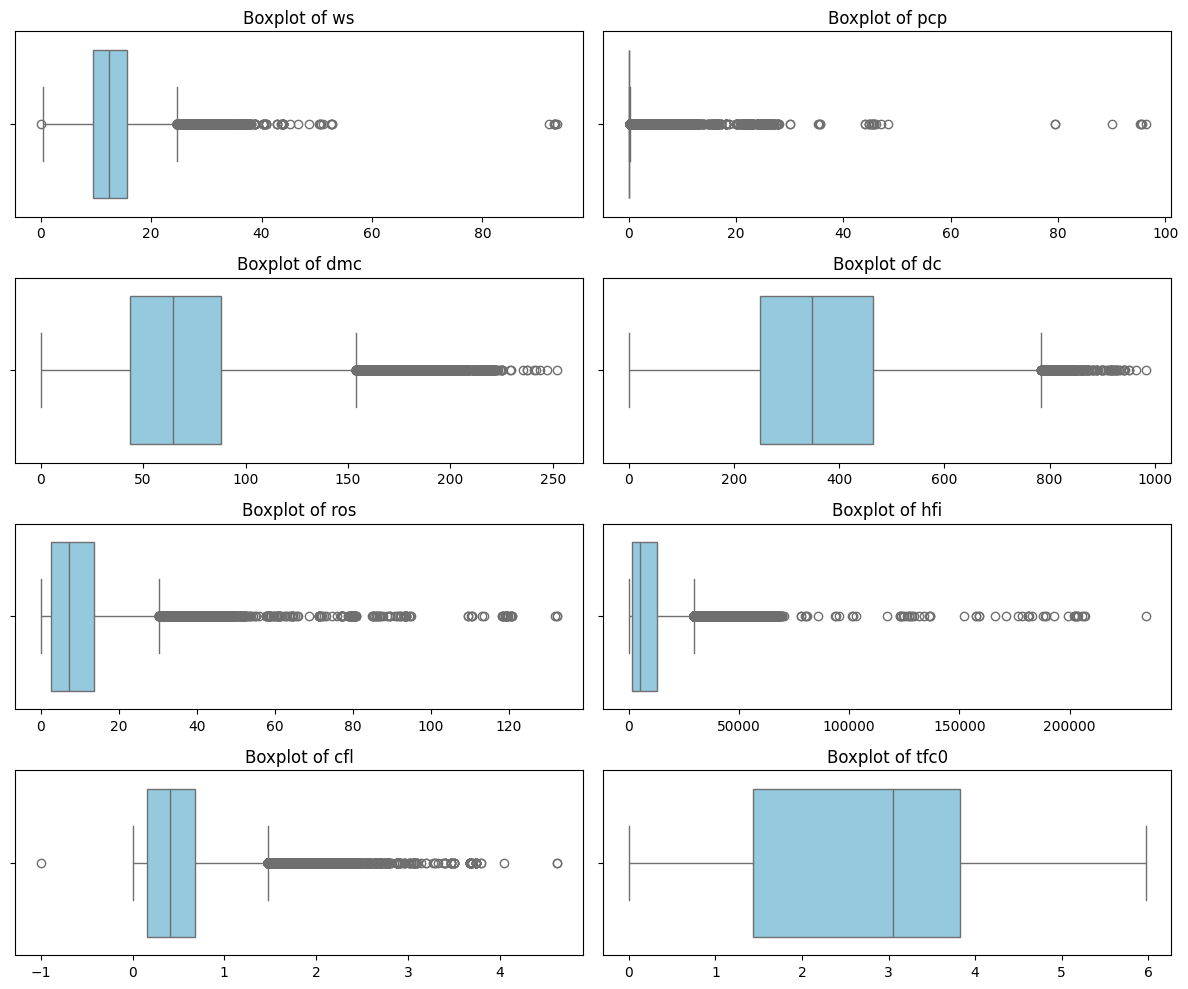

In [123]:
# Select features for visualization
features_to_visualize = ['ws', 'pcp', 'dmc', 'dc', 'ros', 'hfi', 'cfl', 'tfc0']

# Calculate the number of rows and columns for the subplot grid
num_columns = len(features_to_visualize)
num_rows = int(np.ceil(num_columns / 2))

# Create a subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 10))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Iterate over columns and create boxplots
for i, column in enumerate(features_to_visualize):
    sns.boxplot(x=geo_wfp_canada[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('') 
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [124]:
# Analyze the 'source' column
geo_wfp_canada['source']

2          USFS
7          NOAA
11         USFS
31         USFS
44         USFS
          ...  
450328    NASA2
450335     NASA
450337     NASA
450339     NASA
450340    NASA2
Name: source, Length: 207616, dtype: object

In [125]:
print("\nSource column analysis:")
source_counts = geo_wfp_canada['source'].value_counts()
source_counts


Source column analysis:


source
USFS        88932
NASA3       47690
NASA2       44441
NASA_can    11360
NASA         6360
NASA1        4554
NOAA         3539
NASA6         319
NASA7         224
UMD            98
NASA8          91
NASAwcan        5
NASA_usa        3
Name: count, dtype: int64

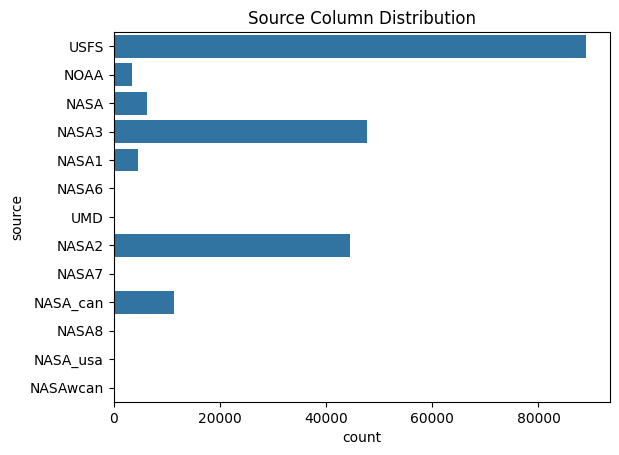

In [126]:
sns.countplot(y=geo_wfp_canada['source'])
plt.title('Source Column Distribution')
plt.show()

**USFS (United States Forest Service):** The USFS is the most common source in the dataset with over 120,000 records. The data is collected from a variety of sensors, including IBAND, MODIS, and VIIRS-I, and from multiple satellites such as JPSS1, Terra, Aqua, S-NPP, and NOAA-20. This indicates a broad and diverse data collection effort by the USFS.


**NASA3:** Another significant contributor with 52,940 records. The data comes from the NOAA-20 satellite using IBAND and VIIRS-I sensors. This indicates another focused data source from a different NASA satellite mission.


**NASA2:** This source contributes a substantial number of records (40,285). The data is primarily collected using IBAND and VIIRS-I sensors from the S-NPP satellite. This suggests a focused source of data from a specific NASA satellite mission.



**NASA6:** This source contributes 33,535 records, collected using IBAND and VIIRS-I sensors from the S-NPP satellite. Like NASA2, this suggests a focused data source from a specific NASA satellite mission.


**NASA7:** This source has 29,541 records. The data is collected from the NOAA-20 satellite using IBAND and VIIRS-I sensors, indicating a similar data collection effort to NASA3.


**NOAA (National Oceanic and Atmospheric Administration):** NOAA contributes 19,932 records, with data collected using various sensors including AVHRR, VIIRS, VIIRS-M, and MODIS from multiple satellites such as METOP-A, S-NPP, NOAA-19, NOAA-15, METOP-B, and NOAA-18. This indicates a diverse data collection effort from multiple satellites.

In [127]:
# Define the most common source
most_common_source = ['USFS', 'NASA2', 'NASA3', 'NASA6', 'NASA7', 'NOAA']

# Function to check the sensor and satellite information for a specific source
def common_source(source, df):
    source_data = df[df['source'] == source]
    unique_sensors = source_data['sensor'].unique()
    unique_satellites = source_data['satellite'].unique()

    print(f"\nSource: {source}")
    print(f"Number of records: {len(source_data)}")
    print("Unique sensors:")
    print(unique_sensors)
    print("Unique satellites:")
    print(unique_satellites)
    print("First 5 entries:")
    print(source_data.head())
    print("-" * 50)

# Iterate over each source and investigate
for source in most_common_source:
    common_source(source, geo_wfp_canada)


Source: USFS
Number of records: 88932
Unique sensors:
['IBAND' 'MODIS' 'VIIRS-I']
Unique satellites:
['JPSS1' 'S-NPP' 'NOAA-20' 'Aqua' 'Terra']
First 5 entries:
                         _id     lat      lon                 rep_date source  \
2   6669b15e44a41007063ba9dc  47.474  -69.938  2020/06/20 06:30:00.000   USFS   
11  6669b15f44a41007063ba9e5  50.782  -98.934  2020/06/25 08:12:00.000   USFS   
31  6669b16344a41007063ba9f9  66.476 -138.357  2020/06/15 22:06:00.000   USFS   
44  6669b16544a41007063baa06  42.780  -82.458  2020/06/20 17:54:00.000   USFS   
48  6669b16644a41007063baa0a  66.487 -138.244  2020/06/14 22:24:00.000   USFS   

   sensor satellite agency    temp  rh  ...   cfb  pcuring  greenup  elev  \
2   IBAND     JPSS1     QC  24.666  54  ...   0.0     29.0      1.0    27   
11  IBAND     JPSS1     MB  25.992  58  ...   0.0     30.0      1.0   268   
31  IBAND     S-NPP     YT  23.022  54  ...   0.0     35.0      1.0   616   
44  IBAND     JPSS1     ON  29.687  43  ...

In [132]:
# Save the cleaned data to cleaned_wildfire.csv
cleaned_csv_path = r'C:\Users\mariajessa\OneDrive - Lambton College\2024S\Capstone Project\WildFireSimulation\cleaned_wildfire.csv'
geo_wfp_canada.to_csv(cleaned_csv_path, index=False)
print(f"Cleaned data saved to {cleaned_csv_path}")

Cleaned data saved to C:\Users\mariajessa\OneDrive - Lambton College\2024S\Capstone Project\WildFireSimulation\cleaned_wildfire.csv
